In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
columns = ['user_id', 'order_date', 'order_products', 'order_amount']
df = pd.read_table('CustomerBehaviorAnalysis.txt', names = columns, sep = '\s+')    # s+可以将tab和多个空格都当成一样的分隔符。skiprows代表忽略文件开始的7行注释之类内容

In [3]:
df.head()

,user_id,order_date,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.describe()

,user_id,order_date,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


大部分订单只消费了少量商品（平均2.4），有一定极值干扰
用户的消费金额比较稳定，平均消费35元，中位数在35元，有一定极值干扰

In [5]:
df.info()    # 日期需要变成date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_date      69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [6]:
df['order_date'] = pd.to_datetime(df.order_date, format = '%Y%m%d')
df['month'] = df.order_date.values.astype('datetime64[M]')

In [7]:
df

,user_id,order_date,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01
69655,23568,1997-04-22,1,14.99,1997-04-01
69656,23569,1997-03-25,2,25.74,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-01


用户消费趋势的分析（每月）：
每月的消费总金额
每月的消费次数
每月的产品购买量
每月的消费人数

In [8]:
grouped_month = df.groupby('month')
order_month_amount = grouped_month.order_amount.sum()
order_month_amount.head()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

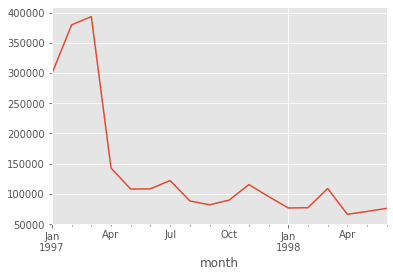

In [9]:
order_month_amount.plot()

上图可知，消费金额在前三个月达到最高峰，后续消费额较为稳定，有轻微下降趋势

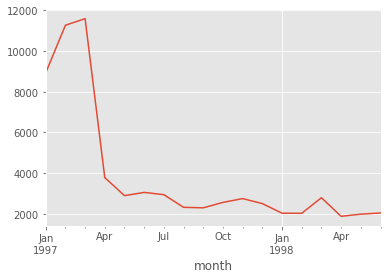

In [10]:
grouped_month.user_id.count().plot()

前三个月消费**订单数**在10000人左右，后续月份的平均消费**订单数**在2500人波动

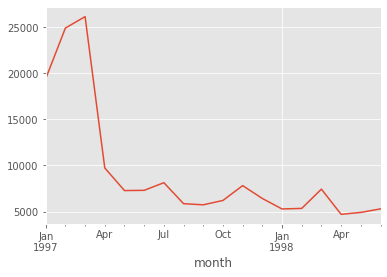

In [11]:
grouped_month.order_products.sum().plot()

前三个月消费**总产品数**在23000左右左右，后续月份的平均消费**订单数**在7500波动

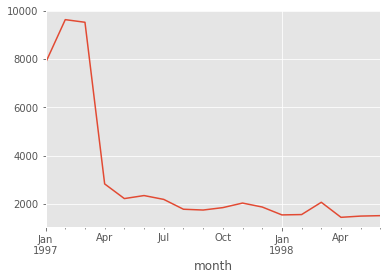

In [12]:
# df.groupby('month')聚合    user_id    x.drop_duplicates()去重    lambda求个数
df.groupby('month').user_id.apply(lambda x:len(x.drop_duplicates())).plot()

每个月的人均消费频次，前三个月在9000左右，后面再2000波动

In [13]:
df.groupby(['month', 'user_id']).count().reset_index()

,month,user_id,order_date,order_products,order_amount
0,1997-01-01,1,1,1,1
1,1997-01-01,2,2,2,2
2,1997-01-01,3,1,1,1
3,1997-01-01,4,2,2,2
4,1997-01-01,5,2,2,2
...,...,...,...,...,...
55374,1998-06-01,23444,1,1,1
55375,1998-06-01,23489,1,1,1
55376,1998-06-01,23513,1,1,1
55377,1998-06-01,23555,1,1,1


In [14]:
df.pivot_table(index = 'month',
               values = ['order_products', 'order_amount', 'user_id'],
               aggfunc = {'order_products':'sum',
                          'order_amount': 'sum',
                          'user_id': 'count'}).head()

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895


用户个体消费分析：
用户消费金额，消费次数的描述统计
用户消费金额和消费散点图
用户消费金额的分布图
用户消费次数的分布图
用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额）

In [15]:
grouped_user = df.groupby('user_id')
grouped_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


用户平均购买了7张CD，但是中位值只有3，说明小部分用户购买了大量的CD
用户平均消费106元，中位值有43，判断同上，有极值干扰

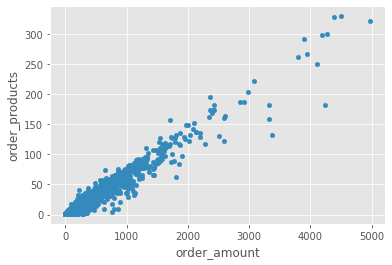

In [16]:
grouped_user.sum().query('order_amount < 6000').plot.scatter(x = 'order_amount', y = 'order_products')

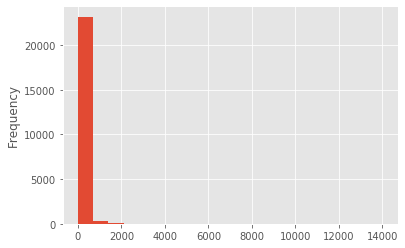

In [17]:
grouped_user.sum().order_amount.plot.hist(bins = 20)

用户消费金额，绝大部分呈现集中趋势，小部分异常值干扰了判断，可以使用过滤操作排除异常

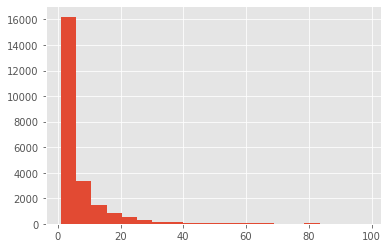

In [18]:
grouped_user.sum().query('order_products < 100').order_products.hist(bins = 20)